In [ ]:
#import networkx as nx
#import matplotlib.pyplot as plt
#import pandas as pd

#G = nx.read_edgelist('users edge list.txt', comments='#', delimiter=None, create_using=nx.DiGraph, nodetype=None, encoding='utf-8')
#print (nx.info(G))
#Name: 
#Type: DiGraph
#Number of nodes: 100386
#Number of edges: 2286592
#Average in degree:  22.7780
#Average out degree:  22.7780

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

data_s=[]

# some CW_Obj have different object separated by ','  
# this loop put them together instead of blindly reading each line
with open("ver. 4 users_neighborhood_anon.csv","r") as file:
#with open("ver. 4 users_neighborhood_anon.csv", mode='r', buffering=10, encoding="utf-8", errors=None, newline=None, closefd=True, opener=None):
    for line in file:
        data = line.strip().split(",")
        data_s.append(data)

tag =data_s[0]
users=[]
for data in data_s[1:]:
    user=dict(zip(tag,data))
    users.append(user)

In [3]:
b=[]
for user in users:
    if user['betweenness']!='':
        b.append(float(user['betweenness']))
ave_b=sum(b)/len(b)
print(sum(b)/len(b))

71609.03158506725


In [67]:
h_users=[]
n_users=[]
o_users=[]
#important users
i_users=[]
for user in users:
#    if user['betweenness']!=''and (float(user['betweenness'])>=(0)):
    if user['betweenness']!=''and (float(user['betweenness'])>(2*ave_b)):
        
        i_users.append(user)
        
        if user['hate']=='hateful':
            h_users.append(user)
        if user['hate']=='normal':
            n_users.append(user)
        if user['hate']=='other':
            o_users.append(user)

print(len(h_users))
print(len(n_users))
print(len(o_users))
print(len(i_users))
#544
#4427
#95413
#100384

#39
#347
#11550
#11936

39
347
11550
11936


In [5]:
nodes=[]
for user in i_users:
    nodes.append(user['user_id'])

In [6]:
edges=[]
with open("users edge list.txt","r") as file:
    for line in file:
        edge = line.strip().split(" ")
        edges.append(edge)
print(edges[0])
print(edges[0][0])

['10999', '55317']
10999


In [13]:
i_edges=[]
for edge in edges:
    if ((edge[0]in nodes) and (edge[1] in nodes))and (edge[0]!=edge[1]):
        i_edges.append(edge)
        
print(len(i_edges))

with open("Simplified Edges.txt","w") as file:
    for e in i_edges:
        file.write(e[0]+' '+e[1]+'\n')

KeyboardInterrupt: 

108


182


In [9]:
G = nx.read_edgelist('Simplified Edges.txt', comments='#', delimiter=None, create_using=nx.DiGraph, nodetype=None, encoding='utf-8')
print (nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 11936
Number of edges: 231419
Average in degree:  19.3883
Average out degree:  19.3883


In [10]:
nx.write_graphml_lxml(G, "test.graphml")  

In [11]:
nx.write_adjlist(G,"test.adjlist")

In [ ]:
print(nx.is_strongly_connected(G))

In [ ]:
print(nx.is_weakly_connected(G))

In [ ]:
largest_cc = max(nx.strongly_connected_components(G), key=len)
print(len(largest_cc))

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))


In [41]:
nodes=[]
for user in h_users:
    nodes.append(user['user_id'])
h_edges=[]
for edge in edges:
#    if ((edge[1] in nodes))and (edge[0]!=edge[1]):
    if ((edge[0]in nodes) and (edge[1] in nodes))and (edge[0]!=edge[1]):
        h_edges.append(edge)
        
print(len(h_edges))

with open("Hateful Edges.txt","w") as file:
    for e in h_edges:
        file.write(e[0]+' '+e[1]+'\n')
  

108


In [27]:
nodes=[]
for user in n_users:
    nodes.append(user['user_id'])
n_edges=[]
for edge in edges:
#    if ((edge[1] in nodes))and (edge[0]!=edge[1]):
    if ((edge[0]in nodes) or (edge[1] in nodes))and (edge[0]!=edge[1]):
        n_edges.append(edge)
        
print(len(n_edges))

with open("Normal Edges.txt","w") as file:
    for e in n_edges:
        file.write(e[0]+' '+e[1]+'\n')

12594


In [43]:
Gh = nx.read_edgelist('Hateful Edges.txt', comments='#', delimiter=None, create_using=nx.DiGraph, nodetype=None, encoding='utf-8')
print (nx.info(Gh))
nx.write_graphml_lxml(Gh, "Hateful test.graphml") 

Name: 
Type: DiGraph
Number of nodes: 34
Number of edges: 108
Average in degree:   3.1765
Average out degree:   3.1765


In [29]:
Gn = nx.read_edgelist('Normal Edges.txt', comments='#', delimiter=None, create_using=nx.DiGraph, nodetype=None, encoding='utf-8')
print (nx.info(Gn))
nx.write_graphml_lxml(Gn, "Normal test.graphml") 

Name: 
Type: DiGraph
Number of nodes: 8704
Number of edges: 12594
Average in degree:   1.4469
Average out degree:   1.4469


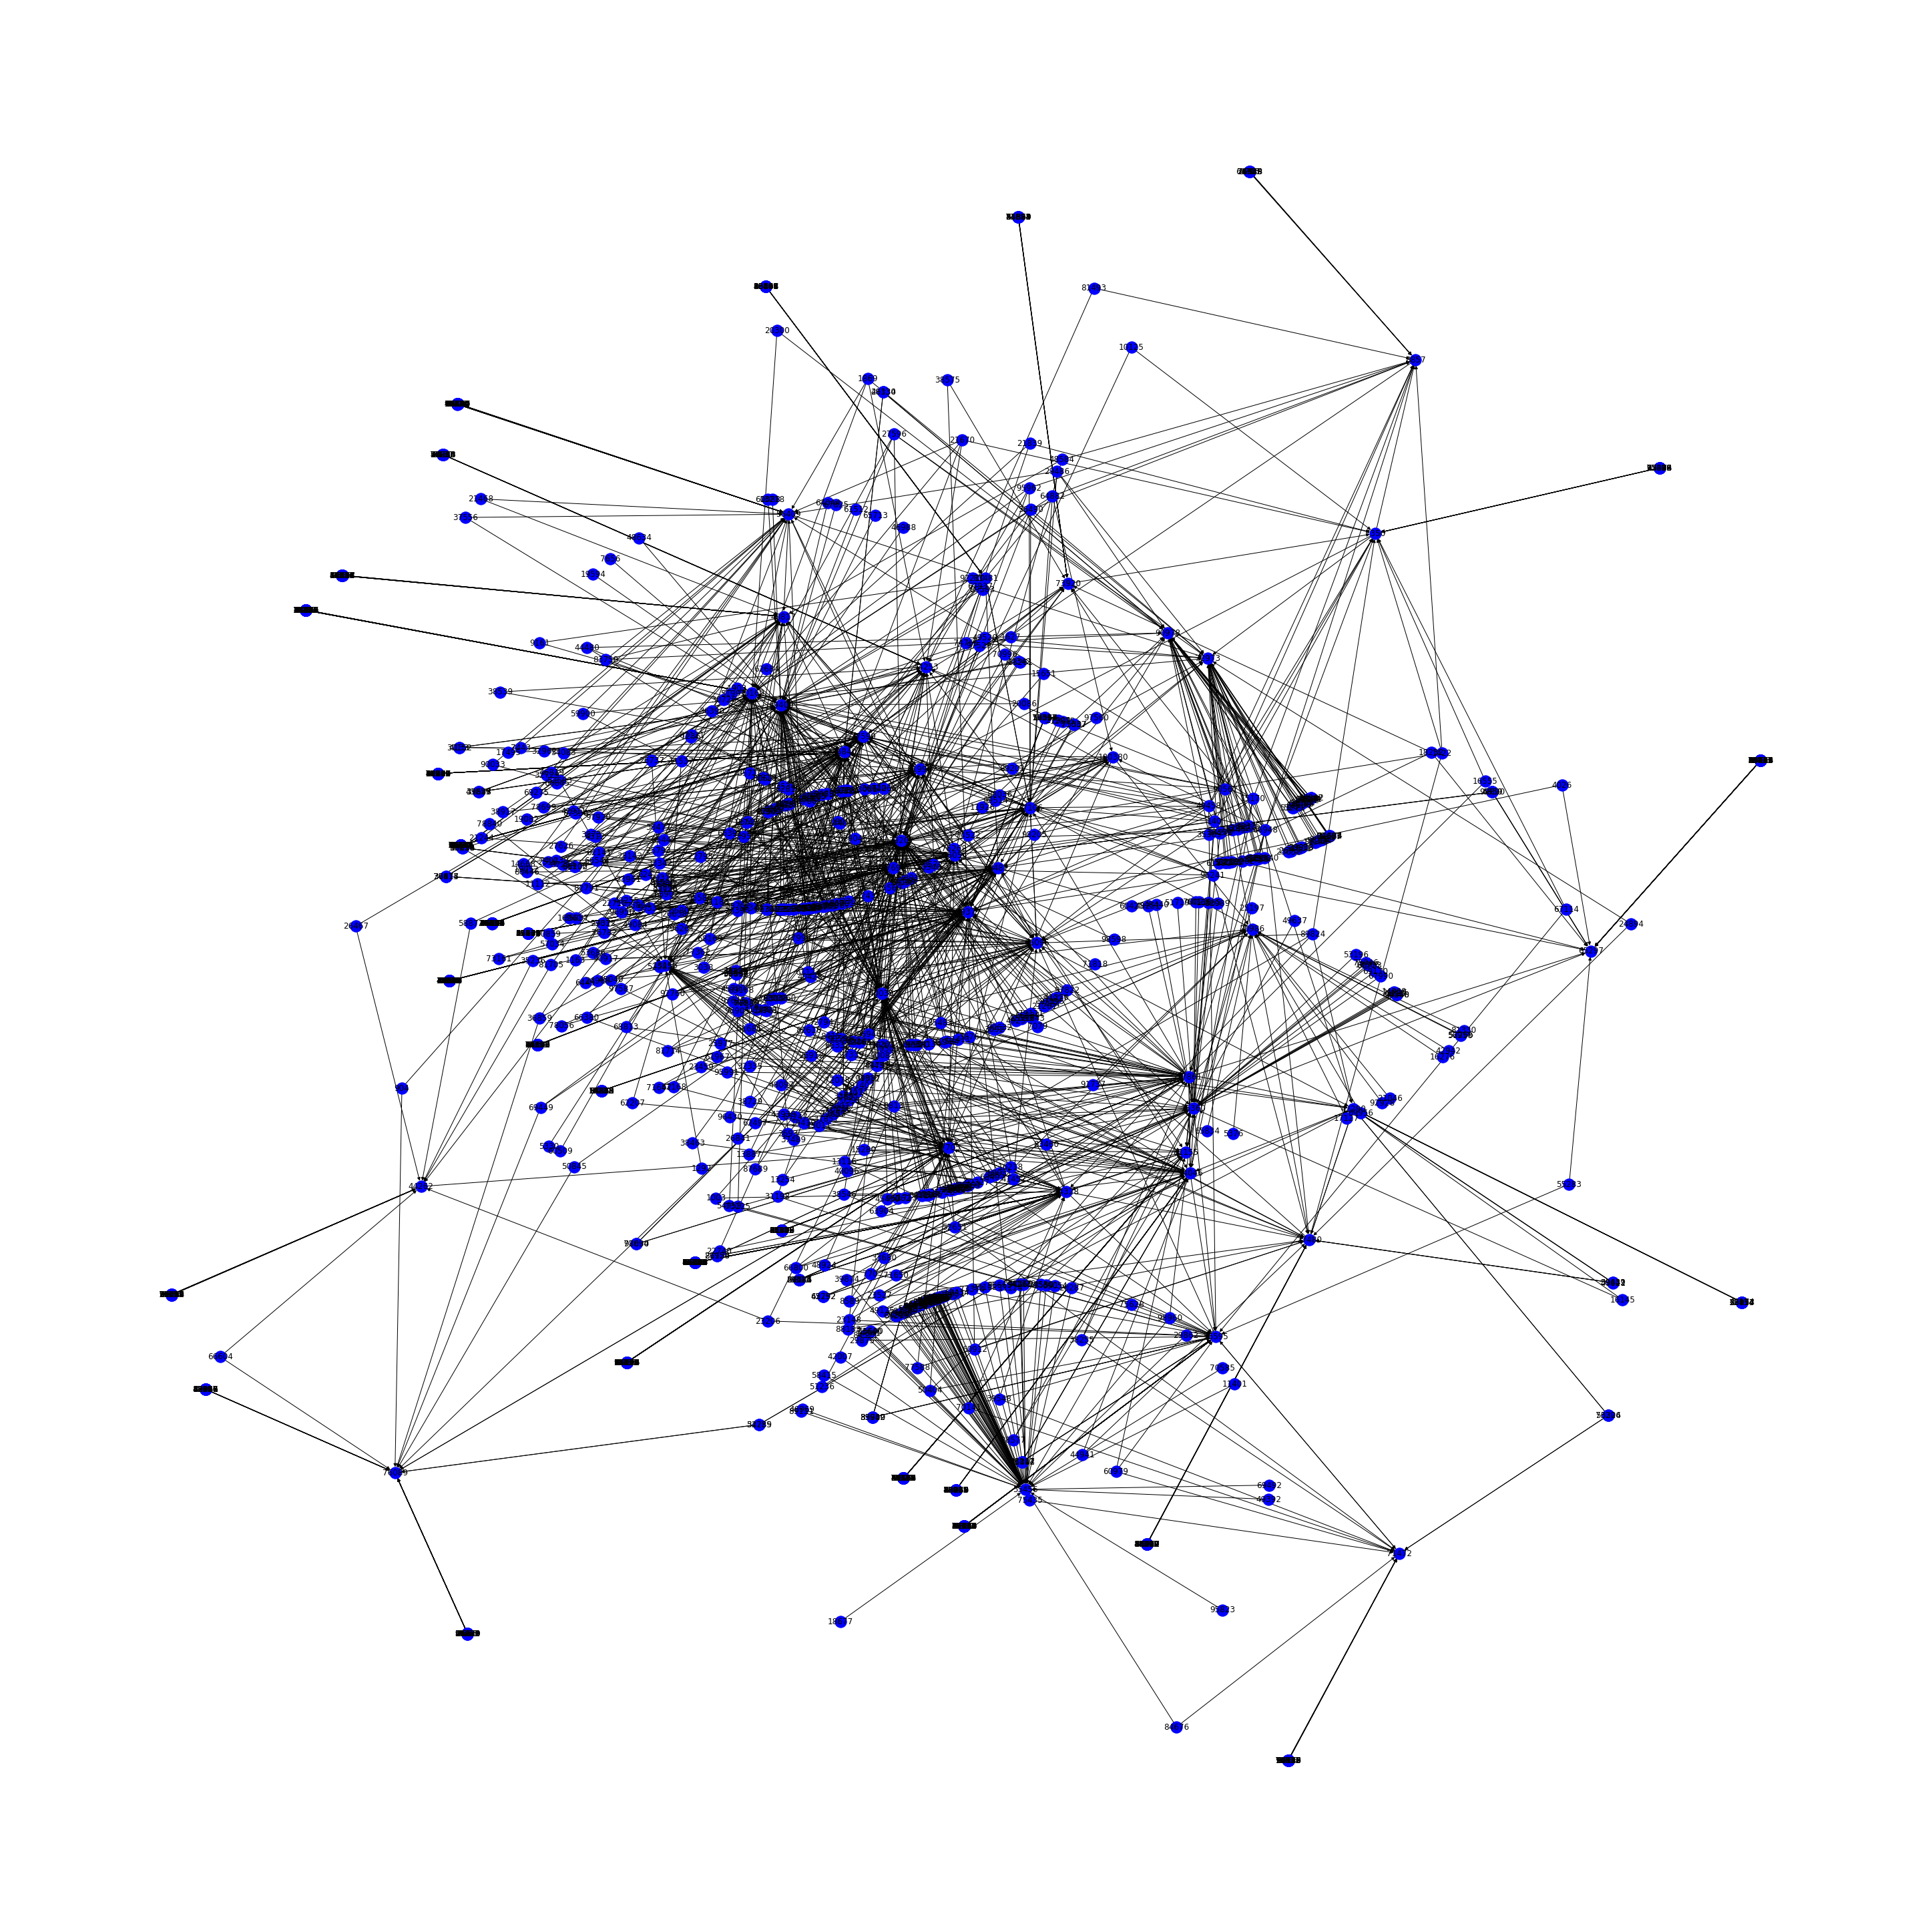

In [39]:
#Gh.remove_node(23538)
plt.figure(figsize=(40,40))
nx.draw(Gh,with_labels=True,node_color='b',nodesize=3,pos=nx.kamada_kawai_layout(Gh, scale=1.5, dim=2))

In [68]:
nodes=[]
for user in h_users:
    nodes.append(user['user_id'])
for user in n_users:
    nodes.append(user['user_id'])   
    
hn_edges=[]
for edge in edges:
#    if ((edge[1] in nodes))and (edge[0]!=edge[1]):
    if ((edge[1] in nodes))and (edge[0]!=edge[1]):
        hn_edges.append(edge)
        
print(len(hn_edges))

with open("HN Edges.txt","w") as file:
    for e in hn_edges:
        file.write(e[0]+' '+e[1]+'\n')
Ghn = nx.read_edgelist('HN Edges.txt', comments='#', delimiter=None, create_using=nx.DiGraph, nodetype=None, encoding='utf-8')
print (nx.info(Gn))
nx.write_graphml_lxml(Ghn, "HN test.graphml") 

14164
Name: 
Type: DiGraph
Number of nodes: 9237
Number of edges: 14164
Average in degree:   1.5334
Average out degree:   1.5334


In [59]:
print(nx.is_strongly_connected(Ghn))
print(nx.is_weakly_connected(Ghn))

False
False


In [60]:
largest_cc = max(nx.strongly_connected_components(Ghn), key=len)
print(len(largest_cc))
print(nx.strongly_connected_components(Ghn))

48
<generator object strongly_connected_components at 0x000002F9860E6840>


In [61]:
nx.write_edgelist(Ghn, "test.edgelist.gz")

In [62]:
nx.write_edgelist(Gh, "test.edgelist.gz")